In [99]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

In [100]:
# Import data
df = pd.read_csv('../Resources/Cleaning2/merged_events_bio.csv')
df.head(5)

,Athlete_ID,Name,Age,Sex,Height(cm),Weight(kg),Sport,Country_Name,Country_Code,Year,Season,isTeamSport,Medal,Result_ID
0,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,False,na,153233
1,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,True,na,153234
2,43737,Andrzej Socharski,29.0,M,173.0,72.0,Shooting,Poland,POL,1976,Summer,False,na,51745
3,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7860
4,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7870


In [101]:
df = df.rename(columns={'Sex': 'Gender'})
df.head(5)

,Athlete_ID,Name,Age,Gender,Height(cm),Weight(kg),Sport,Country_Name,Country_Code,Year,Season,isTeamSport,Medal,Result_ID
0,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,False,na,153233
1,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,True,na,153234
2,43737,Andrzej Socharski,29.0,M,173.0,72.0,Shooting,Poland,POL,1976,Summer,False,na,51745
3,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7860
4,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7870


In [102]:
# Remove rows with no medals
df = df[df['Medal'].notna()]

In [103]:
# Define the medal colors
color_scale = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'brown'}

In [104]:
# Define a function to filter the data by gender and year
def filter_data(df, gender, year):
    if gender == 'Both':
        filtered_df = df
    else:
        filtered_df = df[df['Gender'] == gender]
    if year is not None:
        filtered_df = filtered_df[filtered_df['Year'] == year]
    filtered_df = filtered_df[filtered_df['Medal'].notna()]
    return filtered_df

In [105]:
# Define a function to update the scatter plot based on the dropdown menus
def update_scatter_plot(gender, year):
    # Filter the data by gender and year
    filtered_df = filter_data(df, gender, year)
    
    # Create the scatter plot
    fig = px.scatter(filtered_df, x='Weight(kg)', y='Height(cm)', color='Medal', symbol='Gender', color_discrete_map=color_scale,
                     symbol_map={'M': 'square', 'F': 'circle'}, title=f'Olympic Medalists Height & Weight')
    
    # Set the axis labels
    fig.update_layout(xaxis_title='Weight (kg)', yaxis_title='Height (cm)')
    
    # Show the plot
    fig.show()

In [106]:
# Define the dropdown menus
gender_dropdown = widgets.Dropdown(
    options=['Both', 'M', 'F'],
    value='Both',
    description='Gender:'
)

year_dropdown = widgets.Dropdown(
    options=df['Year'].unique().tolist() + [None],
    value=None,
    description='Year:'
)

In [107]:
# Define the callback functions
def on_gender_change(change):
    update_scatter_plot(change.new, year_dropdown.value)

def on_year_change(change):
    update_scatter_plot(gender_dropdown.value, change.new)

In [108]:
# Register the callback functions
gender_dropdown.observe(on_gender_change, names='value')
year_dropdown.observe(on_year_change, names='value')

In [114]:
# Display the dropdown menus
display(gender_dropdown)
display(year_dropdown)

Dropdown(description='Gender:', options=('Both', 'M', 'F'), value='Both')

Dropdown(description='Year:', index=5, options=(1912, 1976, 1992, 1960, 2016, 2020, 1964, 1952, 1972, 1928, 19…

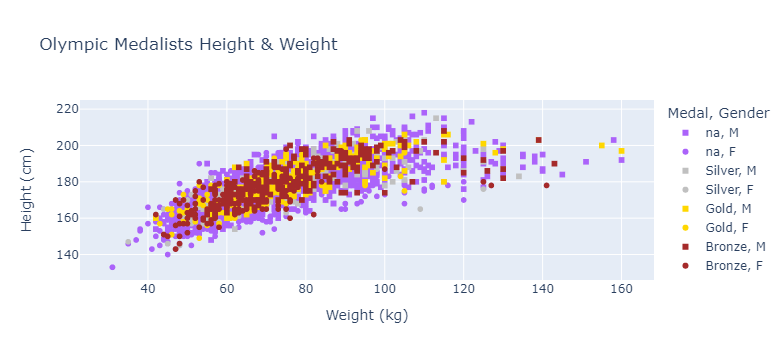

In [115]:
# Create the initial scatter plot
update_scatter_plot(gender_dropdown.value, year_dropdown.value)